# Week4 - Lab

Take a look at this toy dataset. Perform the following operations
* Train-test split
* Train a linear regression model
* Evaluate/create residual plots
* Explain findings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

data1 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_1.csv')
data2 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_2.csv')
data1=data1.drop('Unnamed: 0', axis=1)
data1

,X,y
0,50,147
1,82,246
2,66,207
3,35,105
4,81,240
...,...,...
95,98,285
96,9,18
97,56,174
98,50,159


In [2]:
data2=data2.drop('Unnamed: 0', axis=1)
data2

,X1,X2,y
0,50,B,2510
1,82,B,6738
2,66,B,4355
3,35,A,2225
4,81,A,7560
...,...,...,...
95,98,B,9615
96,9,A,1066
97,56,A,4139
98,50,B,2502


### DATA1

In [3]:
import sklearn
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data1[['X']], data1['y'], test_size=0.2)
X_train

,X
21,38
10,41
39,5
46,29
1,82
...,...
61,93
14,1
16,47
95,98


In [5]:
y_train

21    123
10    114
39      3
46     90
1     246
     ... 
61    273
14     -3
16    144
95    285
12     81
Name: y, Length: 80, dtype: int64

<AxesSubplot:xlabel='X', ylabel='y'>

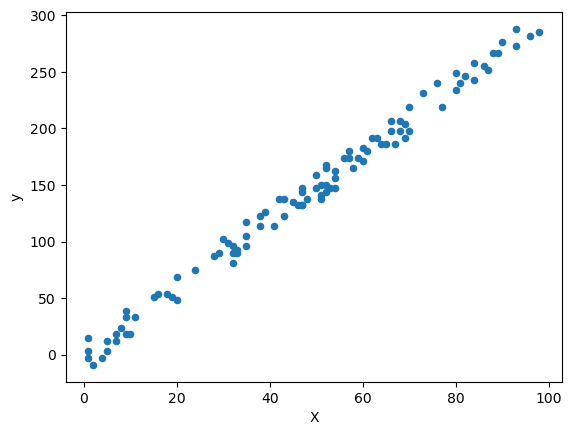

In [6]:
data1.plot.scatter(x="X",y='y')

In [7]:
X = np.array(data1['X']).reshape(-1,1)
y = np.array(data1['y']).reshape(-1,1)
X.shape, y.shape

((100, 1), (100, 1))

In [8]:
from numpy.linalg import inv

const = np.ones(shape=y.shape)
mat = np.concatenate( (const, X), axis=1)
mat[:5,:]

array([[ 1., 50.],
       [ 1., 82.],
       [ 1., 66.],
       [ 1., 35.],
       [ 1., 81.]])

In [27]:
betas = inv(mat.transpose().dot(mat)).dot(mat.transpose()).dot(y)
b0, b1 = betas
betas
print(f'Beta 0: {np.round(b0[0],3)}')
print(f'Beta 1: {np.round(b1[0],3)}')

Beta 0: -1.789
Beta 1: 3.005


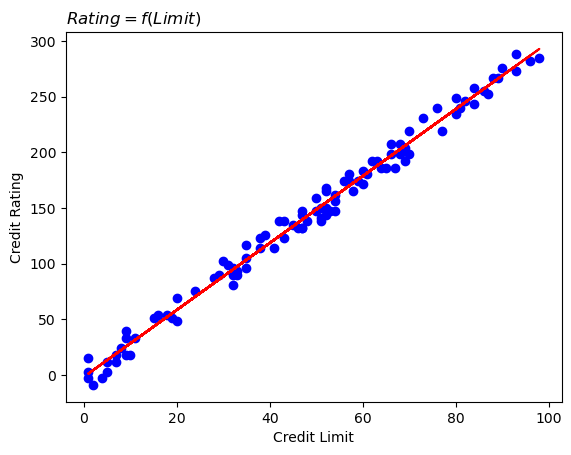

In [10]:
yhat = mat.dot(betas)

plt.plot(X, y, 'bo')
plt.plot(X, yhat, 'r')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Rating')
plt.title('$Rating=f(Limit)$', loc='left')
plt.show()

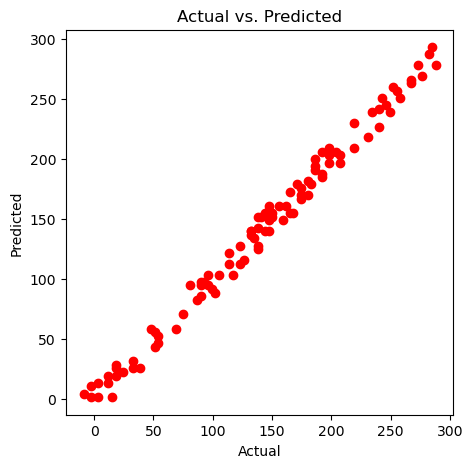

In [11]:
resid = y - yhat

plt.figure(figsize=(5,5))
plt.plot(y, yhat, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

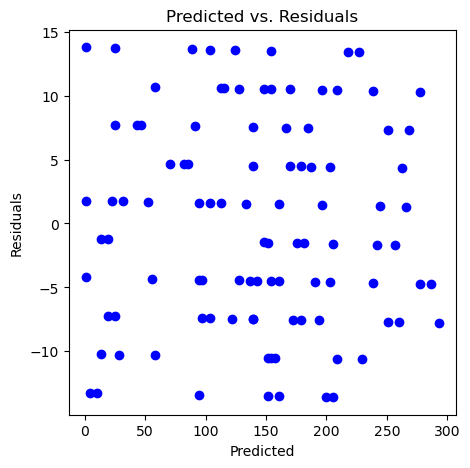

In [12]:
plt.figure(figsize=(5,5))
plt.plot(yhat, resid, 'bo')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs. Residuals')
plt.show()

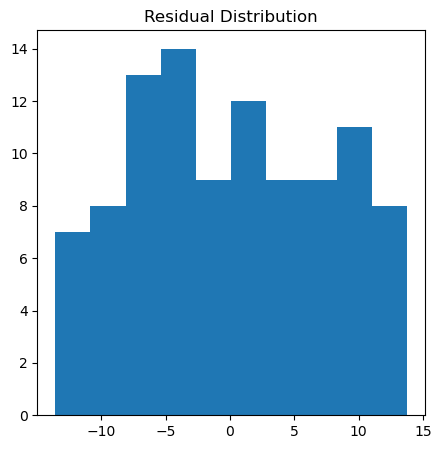

In [13]:
plt.figure(figsize=(5,5))
plt.hist(resid, bins=10)
plt.title('Residual Distribution')
plt.show()

In [14]:
import statsmodels.api as smf

simpleModel = smf.OLS(y, mat).fit()
print(simpleModel.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     9151.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.37e-98
Time:                        23:13:55   Log-Likelihood:                -351.20
No. Observations:                 100   AIC:                             706.4
Df Residuals:                      98   BIC:                             711.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7889      1.707     -1.048      0.2

### Findings

- Overall $r^2$ of 98% - very strong linear relationship as we saw in the initial plot we created.  
- Patterns in Residuals are ideal and looks like normally distributed  
- The t-statistic for the credit limit (x1) is normal (95). 
- We can conclude there is a strong linear relationship.

### DATA2

In [15]:
data2X_train, data2X_test, data2y_train, data2y_test = train_test_split(data2[['X1']], data2['y'], test_size=0.2)
data2X_train

,X1
57,20
38,60
2,66
72,1
99,53
...,...
75,33
6,70
26,5
81,18


In [16]:
data2y_train

57     404
38    3607
2     4355
72     -10
99    3815
      ... 
75    1096
6     4912
26    1035
81    1311
15    1009
Name: y, Length: 80, dtype: int64

<AxesSubplot:xlabel='X1', ylabel='y'>

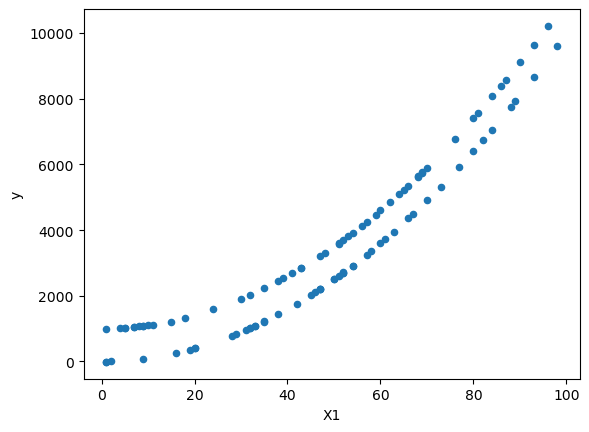

In [17]:
data2.plot.scatter(x="X1",y='y')

In [18]:
X1 = np.array(data2['X1']).reshape(-1,1)
y1 = np.array(data2['y']).reshape(-1,1)
X1.shape, y1.shape

((100, 1), (100, 1))

In [19]:
const = np.ones(shape=y1.shape)
mat1 = np.concatenate( (const, X1), axis=1)
mat1[:5,:]

array([[ 1., 50.],
       [ 1., 82.],
       [ 1., 66.],
       [ 1., 35.],
       [ 1., 81.]])

In [20]:
betas = inv(mat1.transpose().dot(mat1)).dot(mat1.transpose()).dot(y1)
b0, b1 = betas
betas

array([[-942.68920804],
       [  92.40522997]])

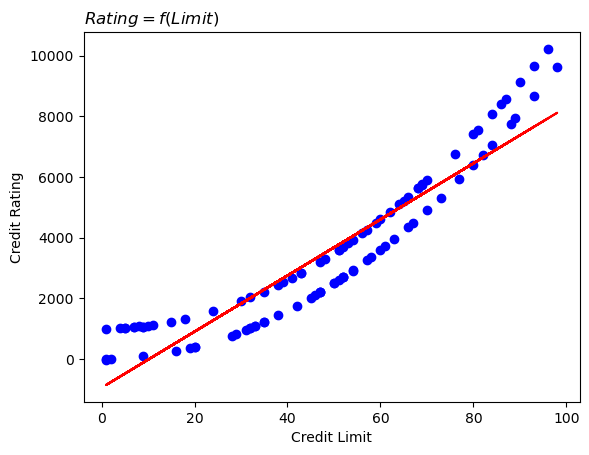

In [21]:
yhat1 = mat1.dot(betas)

plt.plot(X1, y1, 'bo')
plt.plot(X1, yhat1, 'r')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Rating')
plt.title('$Rating=f(Limit)$', loc='left')
plt.show()

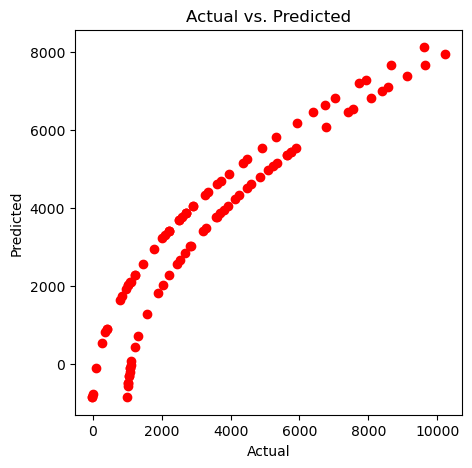

In [22]:
resid1 = y1 - yhat1

plt.figure(figsize=(5,5))
plt.plot(y1, yhat1, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

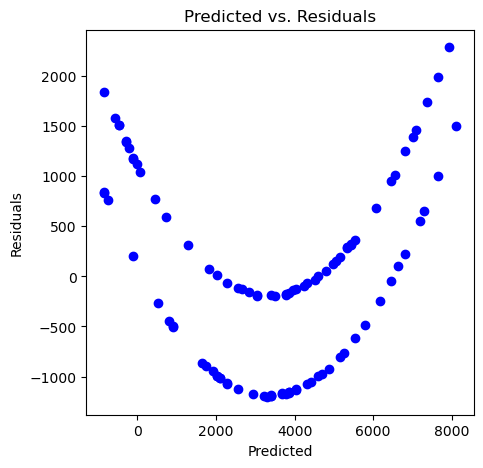

In [23]:
plt.figure(figsize=(5,5))
plt.plot(yhat1, resid1, 'bo')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs. Residuals')
plt.show()

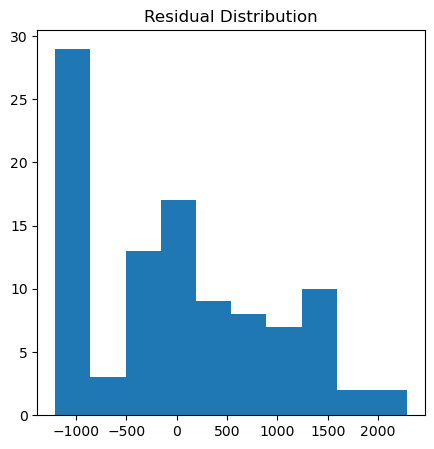

In [24]:
plt.figure(figsize=(5,5))
plt.hist(resid1, bins=10)
plt.title('Residual Distribution')
plt.show()

In [26]:
simpleModel = smf.OLS(y1, mat1).fit()
print(simpleModel.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     659.5
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           2.60e-45
Time:                        23:17:01   Log-Likelihood:                -825.29
No. Observations:                 100   AIC:                             1655.
Df Residuals:                      98   BIC:                             1660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -942.6892    195.449     -4.823      0.0

### Findings

- Overall $r^2$ of 87% - not strong linear relationship.  
- Patterns in Residuals are not ideal and these are not normally distributed.  
- The t-statistic for the credit limit (x1) is low (25). 
- We can conclude there is a weak linear relationship.